In [13]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [14]:
df=pd.read_csv('D:\my_dateset\winequality-white.csv')

In [15]:
df.shape

(4898, 12)

In [16]:
df.columns # the quality is the target variable that we have to predict.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
df.isnull().sum() # no null or Nan values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

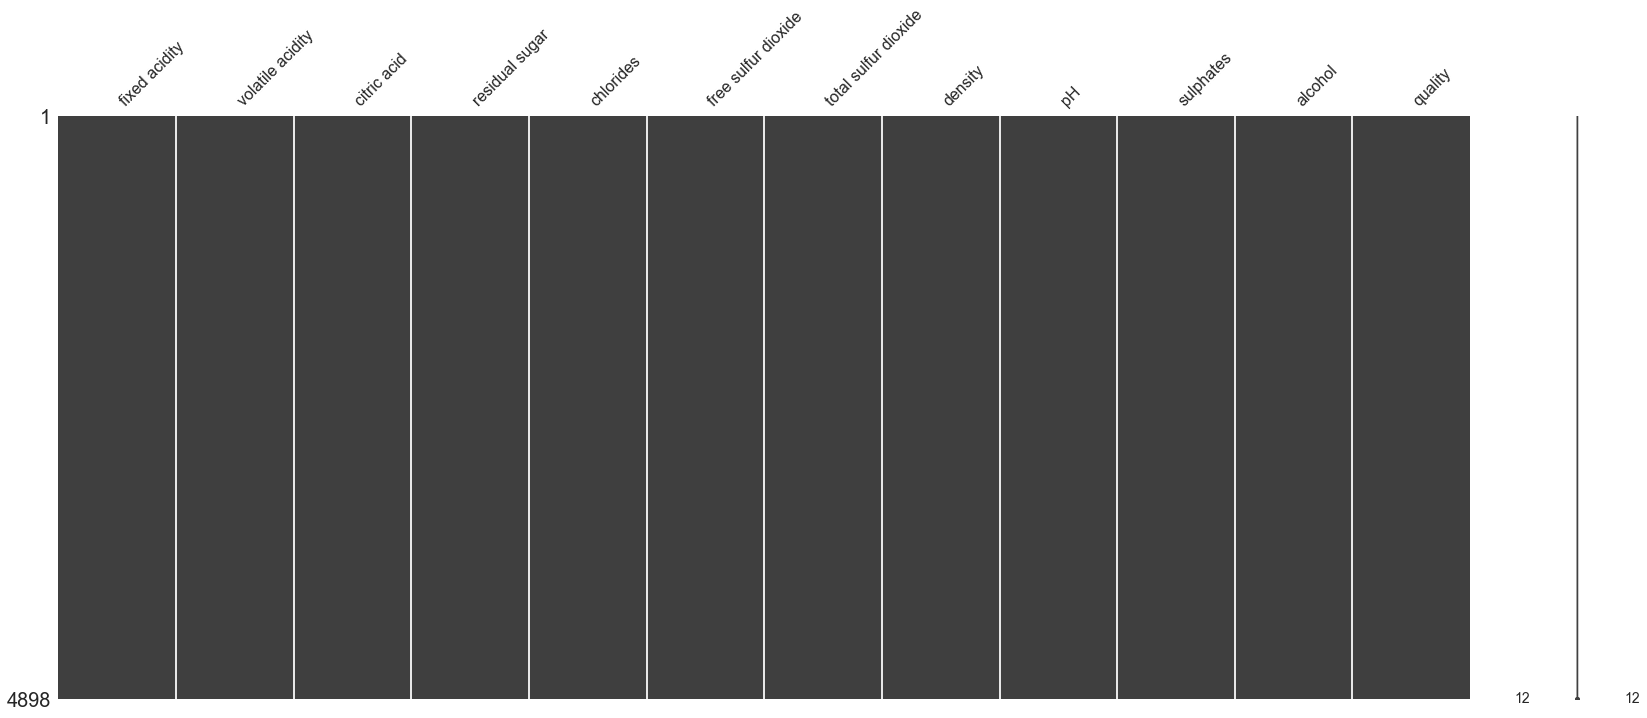

In [19]:
msno.matrix(df)  # just to visualize. no missing values.

In [20]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


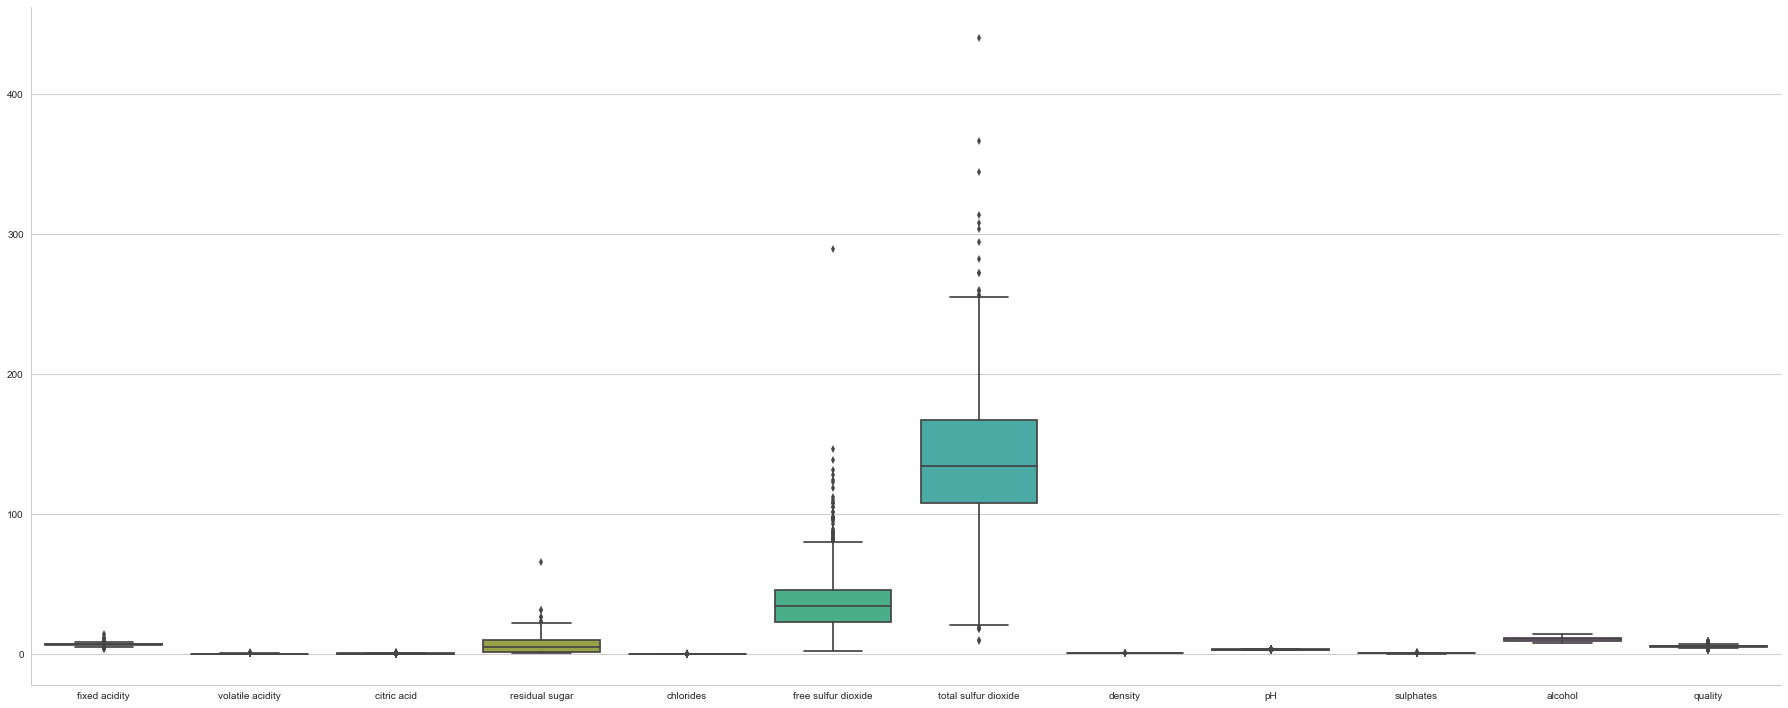

In [21]:
#fixed acidity.
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.

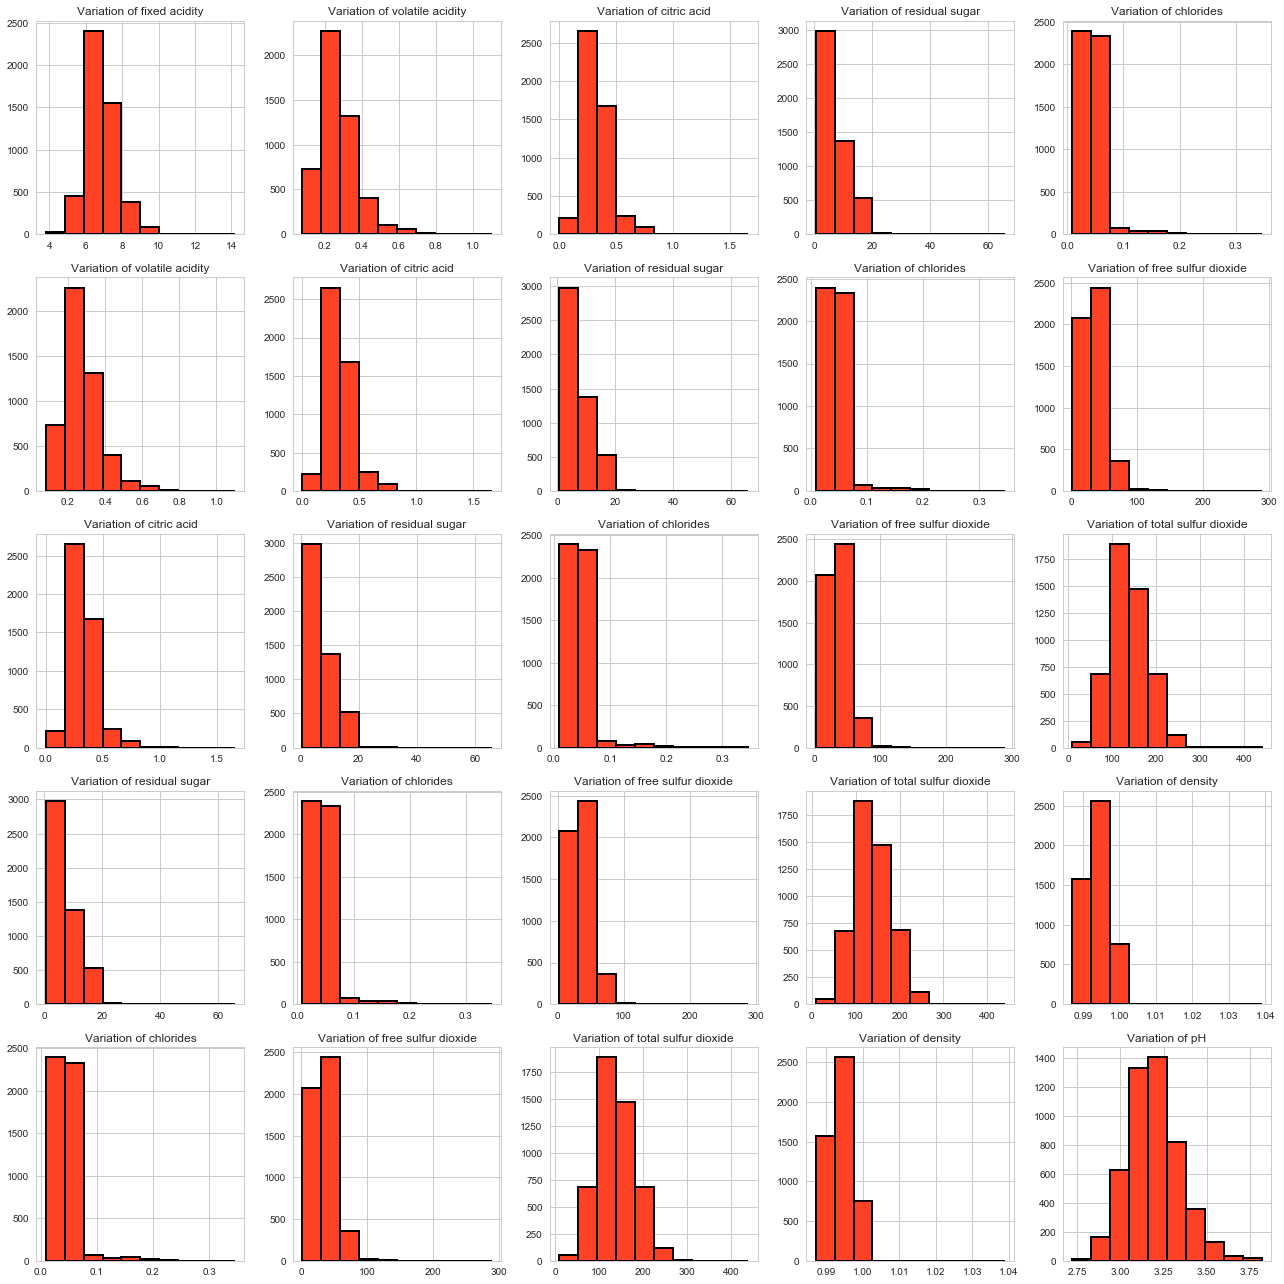

In [22]:
# using a histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

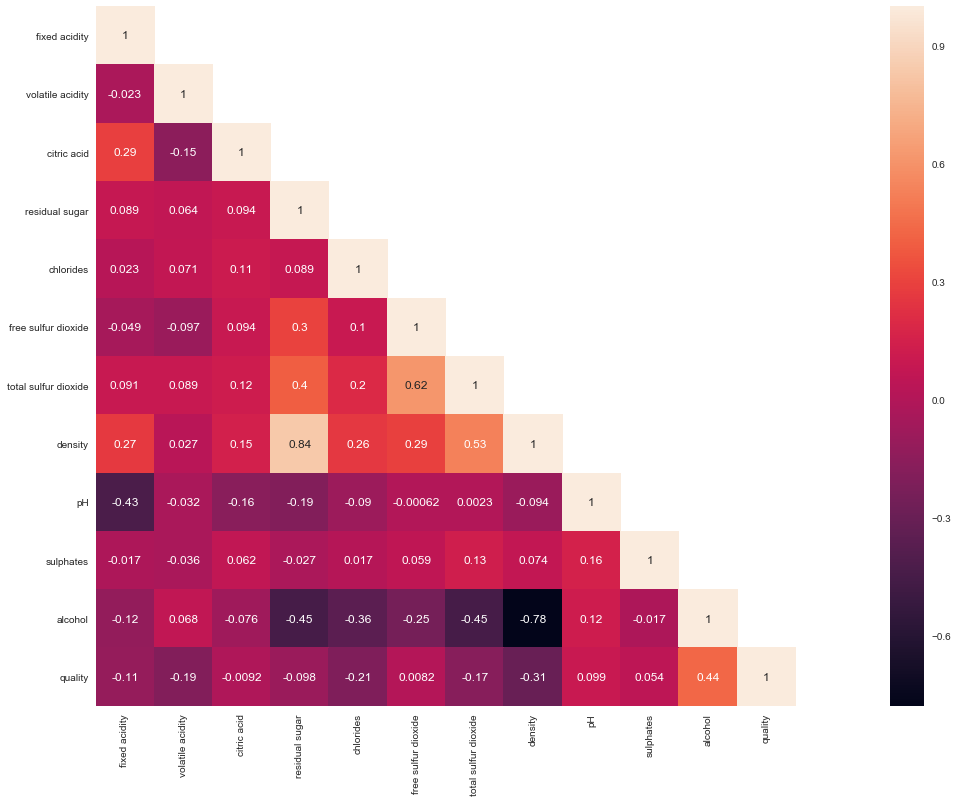

In [23]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [24]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

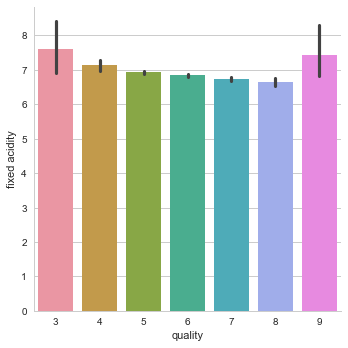

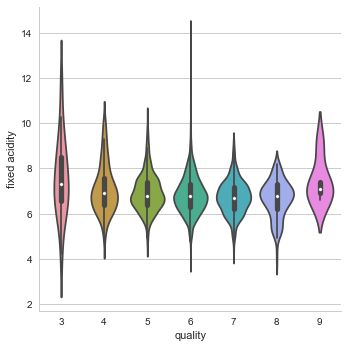

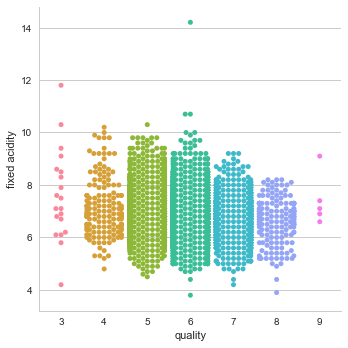

In [25]:
# for fixed acidity.
plot('fixed acidity','quality')

In [26]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [27]:
label_quality = LabelEncoder()

In [28]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'].astype(str))

In [29]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [30]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.7910204081632654,
  0.769795918367347,
  0.8269387755102041,
  0.7771428571428571,
  0.8693877551020408,
  0.8359183673469388,
  0.8253061224489796,
  0.7151020408163266]}

In [31]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.791020
1,LinearSVM,0.769796
2,rbfSVM,0.826939
3,KNearestNeighbors,0.777143
4,RandomForestClassifier,0.869388
5,DecisionTree,0.835918
6,GradientBoostingClassifier,0.825306
7,GaussianNB,0.715102


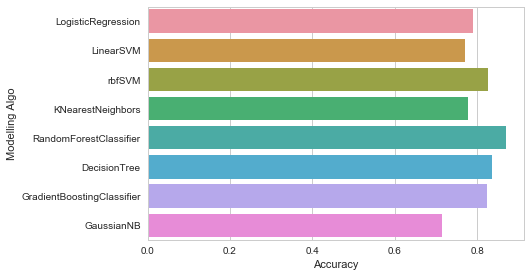

In [32]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

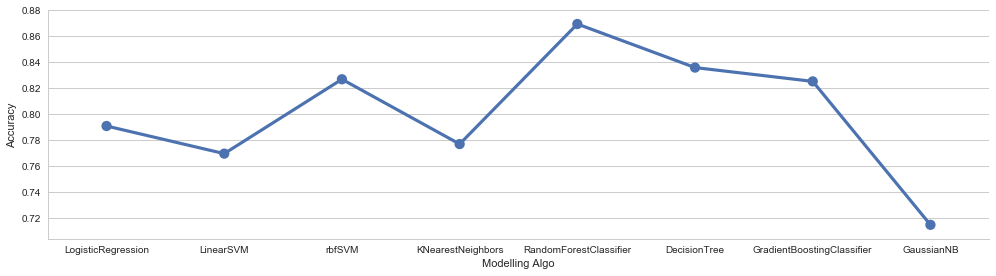

In [33]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

In [34]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)
    

In [35]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])
    

In [36]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.791020,0.787755,0.787755
1,LinearSVM,0.769796,0.787755,0.794286
2,rbfSVM,0.826939,0.768163,0.818776
3,KNearestNeighbors,0.777143,0.827755,0.837551
4,RandomForestClassifier,0.869388,0.877551,0.866939
5,DecisionTree,0.835918,0.840816,0.840000
6,GradientBoostingClassifier,0.825306,0.824490,0.824490
7,GaussianNB,0.715102,0.713469,0.713469


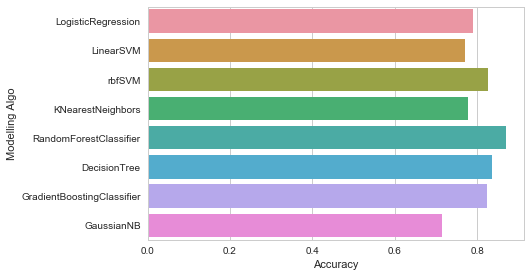

In [37]:
# just to visualize the accuracies.
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

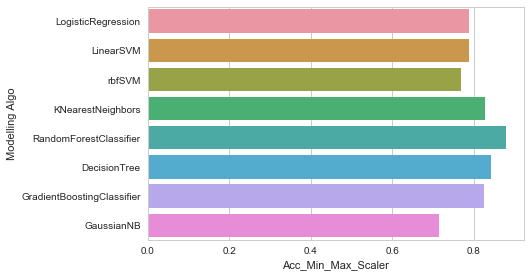

In [38]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

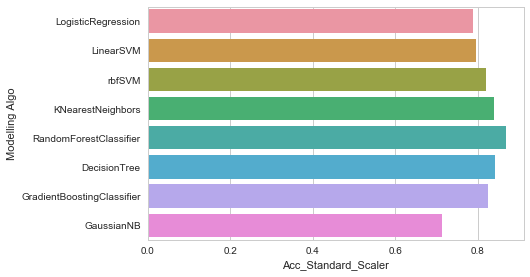

In [39]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [40]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# 进入参数调整

1. LOGISTIC REGRESSION.

In [41]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
clf_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [43]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8086033215355295

In [44]:
clf_lr.grid_scores_

[mean: 0.78873, std: 0.00128, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.79935, std: 0.01430, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.79989, std: 0.01104, params: {'C': 0.01, 'penalty': 'l1'},
 mean: 0.80860, std: 0.01511, params: {'C': 0.01, 'penalty': 'l2'},
 mean: 0.80724, std: 0.01466, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.80779, std: 0.01597, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.80561, std: 0.01601, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.80479, std: 0.01663, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.80534, std: 0.01613, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.80534, std: 0.01613, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.80506, std: 0.01665, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.80534, std: 0.01613, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.80506, std: 0.01665, params: {'C': 1000, 'penalty': 'l1'},
 mean: 0.80506, std: 0.01665, params: {'C': 1000, 'penalty': 'l2'}]

In [45]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.7877551020408163

2.KNN

In [46]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
clf_knn.best_score_

0.8385515927035121

In [48]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [49]:
clf_knn.grid_scores_

[mean: 0.83855, std: 0.01620, params: {'n_jobs': -1, 'n_neighbors': 1},
 mean: 0.83283, std: 0.01280, params: {'n_jobs': -1, 'n_neighbors': 2},
 mean: 0.81840, std: 0.01590, params: {'n_jobs': -1, 'n_neighbors': 3},
 mean: 0.83147, std: 0.01816, params: {'n_jobs': -1, 'n_neighbors': 4},
 mean: 0.82085, std: 0.01905, params: {'n_jobs': -1, 'n_neighbors': 5},
 mean: 0.82984, std: 0.01340, params: {'n_jobs': -1, 'n_neighbors': 6},
 mean: 0.81922, std: 0.01814, params: {'n_jobs': -1, 'n_neighbors': 7},
 mean: 0.81949, std: 0.01652, params: {'n_jobs': -1, 'n_neighbors': 8},
 mean: 0.81786, std: 0.01652, params: {'n_jobs': -1, 'n_neighbors': 9},
 mean: 0.81895, std: 0.01622, params: {'n_jobs': -1, 'n_neighbors': 10},
 mean: 0.81405, std: 0.01665, params: {'n_jobs': -1, 'n_neighbors': 11},
 mean: 0.81677, std: 0.01932, params: {'n_jobs': -1, 'n_neighbors': 12},
 mean: 0.81704, std: 0.02207, params: {'n_jobs': -1, 'n_neighbors': 13},
 mean: 0.81949, std: 0.01854, params: {'n_jobs': -1, 'n_neig

In [50]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.8595918367346939

3.SVM

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=LinearSVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

ValueError: Invalid parameter gamma for estimator LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
clf.best_score_

NameError: name 'clf' is not defined

In [ ]:
clf.best_params_

In [ ]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

NameError: name 'LinearSVC' is not defined

In [ ]:
clf_svm.best_score_

NameError: name 'clf_svm' is not defined

In [ ]:
clf_svm.best_params_

In [ ]:
clf_svm.grid_scores_

In [ ]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

4. RANDOM FOREST.

In [ ]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

In [ ]:
clf_rf.best_score_

In [ ]:
clf_rf.best_params_

In [ ]:
clf_rf.grid_scores_

In [ ]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

5. GRADIENT BOOSTING.

In [ ]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

In [ ]:
clf_gb.best_score_

In [ ]:
clf_gb.best_params_

In [ ]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)